# __Application Of Ensemble Techniques with Bank Data__

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')


from scipy.stats import pearsonr
from statistics import median,mean

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

import pydotplus
import graphviz
from statistics import median,mean

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score, precision_score




In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

# Import Data

In [2]:
data = pd.read_csv('bank-full.csv')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Exploratory Data Analysis

## Shape of The Data

In [4]:
data.shape


(45211, 17)

* _There are_ - __45211 Rows and 17 Columns__ _in this dataset._

## Data Type of Each Attribute

In [5]:
# Data type of each attribute

data.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

* __Observations__-

- 10 features have object type, and 7 are integers/numbers

- As per given data we know that 10 features are of Object type (category type). 

- So, we have to convert them (object feature) as category type.


In [6]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [7]:
data[['job', 'marital', 'education' , 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','Target']] = data[['job', 'marital', 'education' , 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']].apply(pd.Categorical)


In [8]:
data.dtypes.to_frame("Datatypes of Attributes").T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


* After conversion of datatypes:
- Category datatype - 10 Features & 
- int datatype - 7 Features

# Handling Missing Values

In [9]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

- No Missing Values in Data

## Checking Unknown Values

* Checking for columns having unknown values with "value_counts()"

In [10]:

data['poutcome'].value_counts()


unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [11]:
data['contact'].value_counts()


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [12]:
data['education'].value_counts()


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [13]:
data['job'].value_counts()


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [14]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [15]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [16]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [17]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [18]:
data['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

* __Observation__-
* Data has unknown values in - Contact, Education, Job & poutcome columns 

# Statistics - Five Point Summary 
- _of numerical features_

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


* __Observation__-

- Outliers are present in age, balance, duration, campaign, pdays, previous

- balance, duration, campaign, pdays & previous columns are right skewed

- Minimum age is 18 years & maximum 95 years

- Minimum balance is -8019 & maximum balance is 102127



In [20]:
data.loc[data['pdays'] == 999]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


* All persons have'en contacted Previously

# Distribution Of All Features

## Distributions of numerical columns

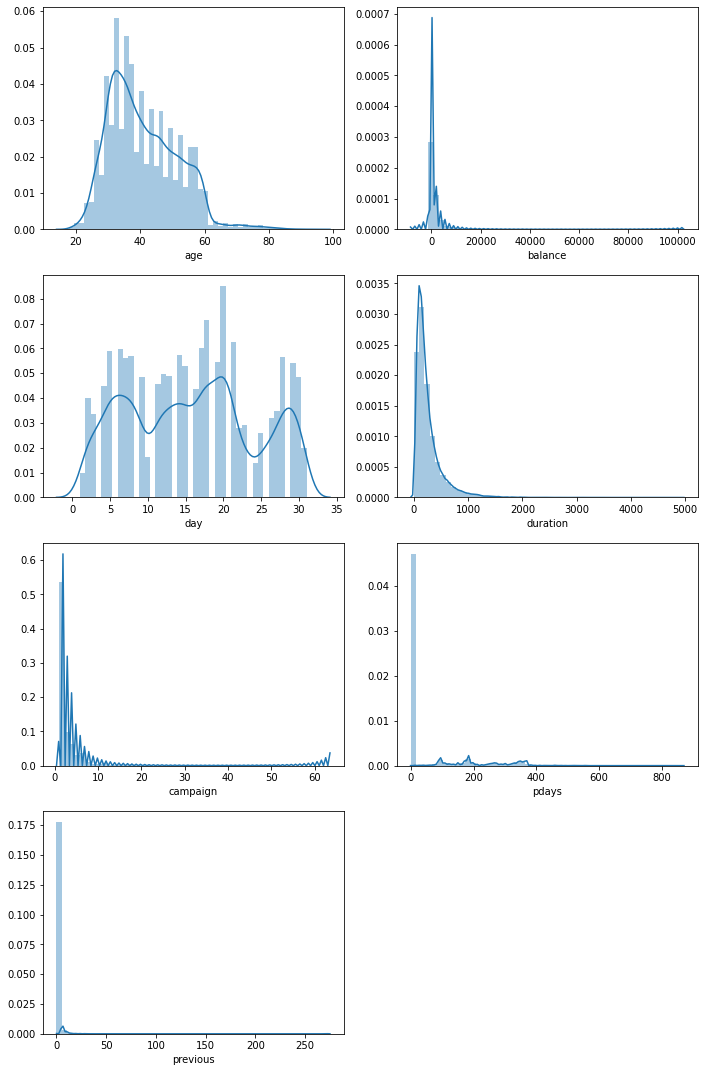

In [21]:
fig, axe = plt.subplots(nrows=4, ncols=2,figsize=(10, 15))
axe=axe.flatten()         
# .flatten() -  is used to flatten subplot index positions

# sns.distplot() - is used to plot Distance plots of respective features
sns.distplot(data['age'], ax=axe[0])
sns.distplot(data['balance'], ax=axe[1])
sns.distplot(data['day'], ax=axe[2])
sns.distplot(data['duration'], ax=axe[3])
sns.distplot(data['campaign'], ax=axe[4])
sns.distplot(data['pdays'], ax=axe[5])
sns.distplot(data['previous'], ax=axe[6])
fig.tight_layout()     # .tight_layout() - is used to arrange the plots
fig.show()
axe.flat[-1].set_visible(False)

* __Observations__-

- __Age__ is _Normally distributed_

- __balance, duration, campaign, pdays, previous__ are _right skewed_


## Distribution of categorical Features

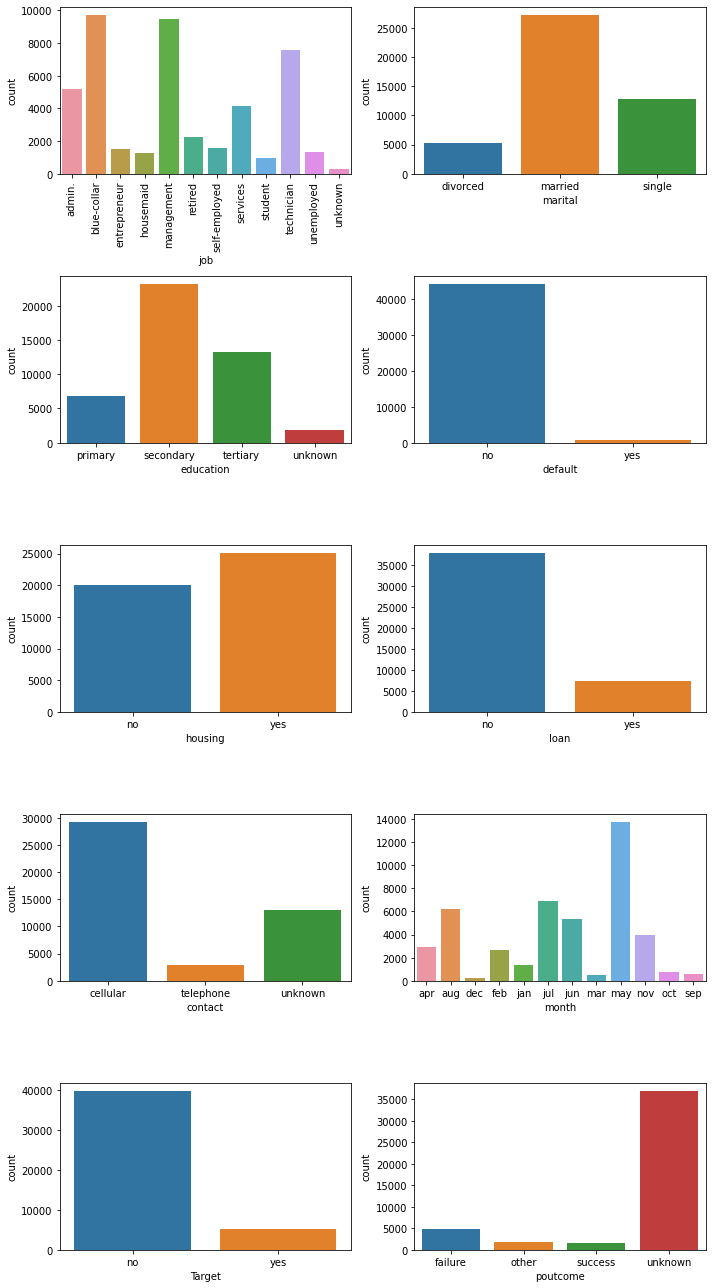

In [22]:
fig, axe = plt.subplots(nrows=5, ncols=2,figsize = (10,18))
axe=axe.flatten()

plot=sns.countplot(x=data['job'], data=data, ax=axe[0])
plt.setp(plot.get_xticklabels(), rotation=90)
sns.countplot(x=data['marital'],data=data, ax=axe[1]) 
sns.countplot(x=data['education'],data=data, ax=axe[2])
sns.countplot(x=data['default'],data=data, ax=axe[3])
sns.countplot(x=data['housing'],data=data, ax=axe[4])
sns.countplot(x=data['loan'],data=data, ax=axe[5])
sns.countplot(x=data['contact'],data=data, ax=axe[6])
sns.countplot(x=data['month'],data=data, ax=axe[7])
sns.countplot(x=data['Target'],data=data, ax=axe[8])
sns.countplot(x=data['poutcome'],data=data,ax=axe[9])

fig.tight_layout()
fig.show()


* __Observations__- 
-  _from count plot of categorical features-_


- __Default__ - More than 90% customers have _no default_

- Around __88% customers__ have _not subscribed for term deposit_

- __Month__ - Most customers have been _contacted in the month of May_

- __Contact__ - Most of the _customers have been contacted by cellular network_

- __Housing__ - _Number of customers have housing loan is more_ than the number of customers who don't have housing loan

- Around __6% customers__ have _credit in default_


## Measure of skewness of numerical features

In [23]:
data.skew().to_frame('skewness Measure').T

,age,balance,day,duration,campaign,pdays,previous
skewness Measure,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


* __Observation__-

- we don't have left skewness in data it means our _data is having positive skewness_


## Checking the Presence of the Outliers in data (Outliers Detection)

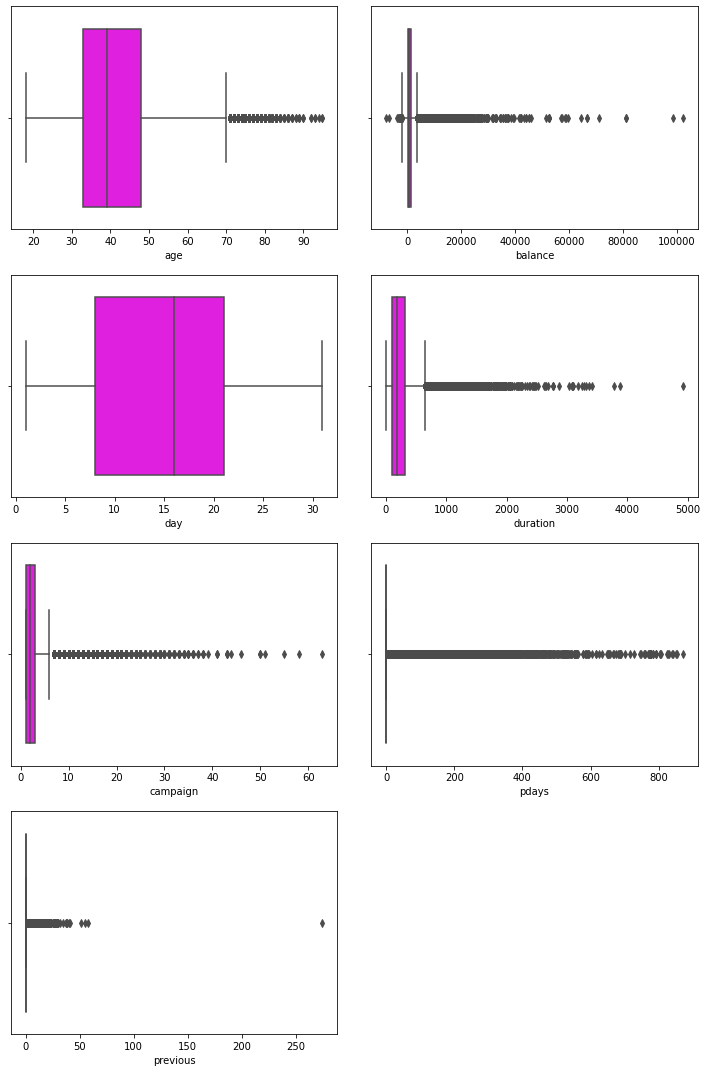

In [24]:
# Checking the Presence of the outliers in data

fig, axe = plt.subplots(nrows=4, ncols=2,figsize = (10,15))
axe=axe.flatten()

sns.boxplot (x='age',data=data, color='magenta', ax=axe[0])
sns.boxplot (x='balance',data=data, color='magenta', ax=axe[1])
sns.boxplot (x='day',data=data, color='magenta',  ax=axe[2])
sns.boxplot (x='duration',data=data, color='magenta', ax=axe[3])
sns.boxplot (x='campaign',data=data, color='magenta', ax=axe[4])
sns.boxplot (x='pdays',data=data, color='magenta', ax=axe[5])
sns.boxplot (x='previous',data=data, color='magenta', ax=axe[6])


fig.tight_layout()
fig.show()

axe.flat[-1].set_visible(False)

* __Observations__- _from boxplot of categorical features_

- We have _outliers_ in __age, balance, campaign , pdays and previous__ columns

- __Balance__ column have _values less than zero_

## Distribution of Target Column

In [25]:
# Value counts of Target column

data['Target'].value_counts().to_frame('Target feature Distribution')



,Target feature Distribution
no,39922
yes,5289


* __Observation__

* From above values it can be stated that the dataset is imbalanced.

# Data Preprocessing

In [26]:
data.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


## Label Encoding Of Variables

In [27]:
df = data.copy()
encoder = LabelEncoder()


df['default']=encoder.fit_transform(df['default']).astype(int)
df['marital']=encoder.fit_transform(df['marital']).astype(int)
df['loan']=encoder.fit_transform(df['loan']).astype(int)
df['housing']=encoder.fit_transform(df['housing']).astype(int)
df['Target']=encoder.fit_transform(df['Target']).astype(int)
df['month']=encoder.fit_transform(df['month']).astype(int)
df['poutcome']=encoder.fit_transform(df['poutcome']).astype(int)
df['education']=encoder.fit_transform(df['education']).astype(int)



In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


## Checking and Modifying DataTypes after Label Encoding

In [29]:
# Cheking info to know datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int32
Target       45211 non-null int32
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [30]:
# Changing datatype of features with .apply()
df[['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome','Target']] = df[['job','marital',
                           'education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [31]:
# Checking info after changing datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


## Handling Outliers with Mean Replacement

In [32]:
meanbal=float(df['balance'].mean())
df['balance'] = np.where(df['balance']>np.percentile(df['balance'],75), meanbal, df['balance'])

In [33]:
meandur = float(df['duration'].mean())
df['duration'] = np.where(df['duration']>np.percentile(df['duration'], 75), meanbal, df['duration'])

In [34]:
meancam= float(df['campaign'].mean())
df['campaign'] = np.where(df['campaign']>np.percentile(df['campaign'],75), meanbal, df['campaign'])


In [35]:
meanpd= float(df['pdays'].mean())
df['pdays'] = np.where(df['pdays']>np.percentile(df['pdays'],75), meanbal, df['pdays'])


In [36]:
meandpr= float(df['previous'].mean())
df['previous'] = np.where(df['previous']>np.percentile(df['previous'],75), meanbal,df['previous'])

## Plotting Boxplots  After Removing/handling Outliers

  Boxplots after handling outliers :


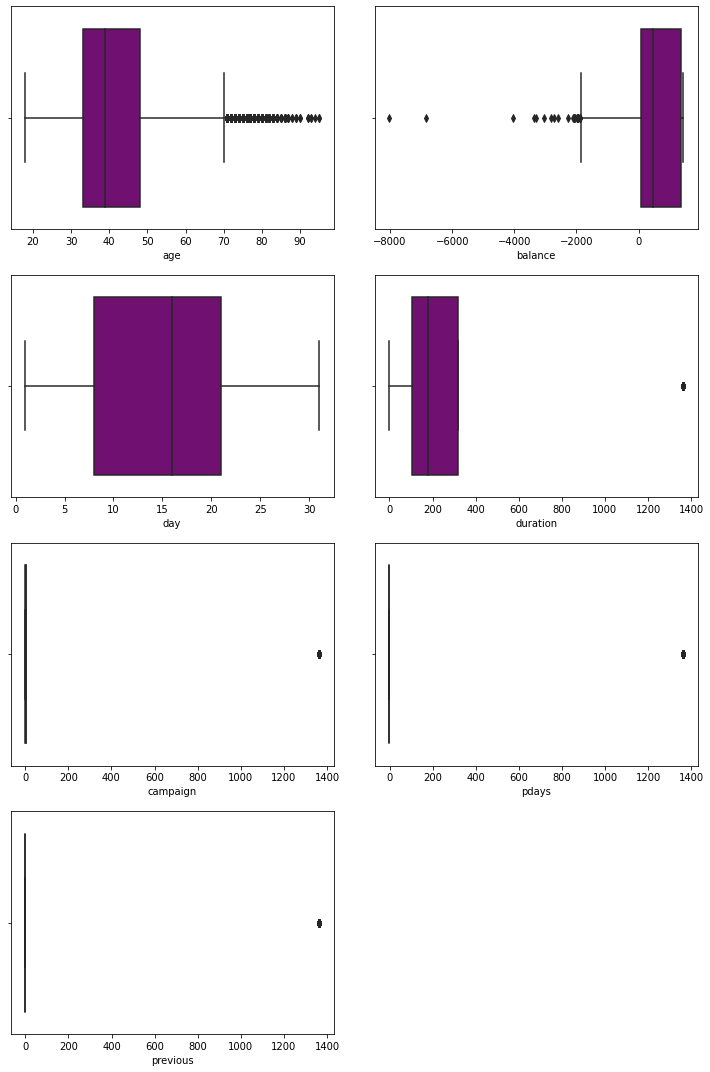

In [37]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

axe=axe.flatten()

sns.boxplot (x='age',data=df, color='purple', ax=axe[0])
sns.boxplot (x='balance',data=df, color='purple', ax=axe[1])
sns.boxplot (x='day',data=df, color='purple', ax=axe[2])
sns.boxplot (x='duration',data=df, color='purple', ax=axe[3])
sns.boxplot (x='campaign',data=df, color='purple', ax=axe[4])
sns.boxplot (x='pdays',data=df, color='purple', ax=axe[5])
sns.boxplot (x='previous',data=df, color='purple', ax=axe[6])


fig.tight_layout()

fig.show()

axe.flat[-1].set_visible(False)

print('  Boxplots after handling outliers :')

* __Observations__ -
- _from boxplot after removal of outliers_

- Outliers from __age__ column are _not removed as they are a specific value for each record._

- After handling Outliers from __balance__ column the _number of outliers on the lower side has increased._

 


## Correlation plot of all features

<AxesSubplot:>

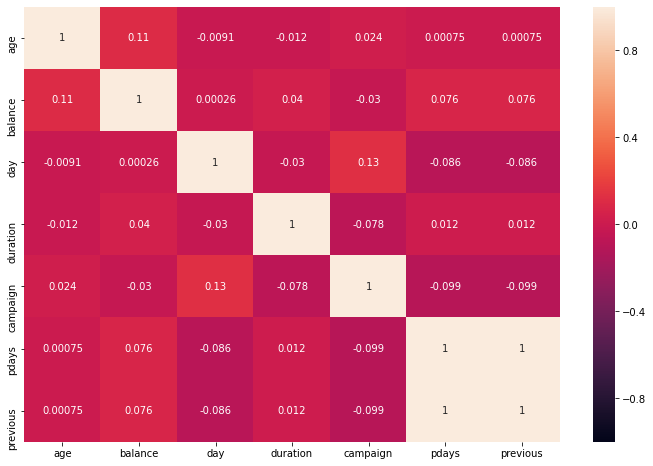

In [38]:
# Correlation Plot after removing outliers
plt.figure(figsize= (12,8))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1)

* __Observation:__

- pdays and previous are highly correlated


<AxesSubplot:>

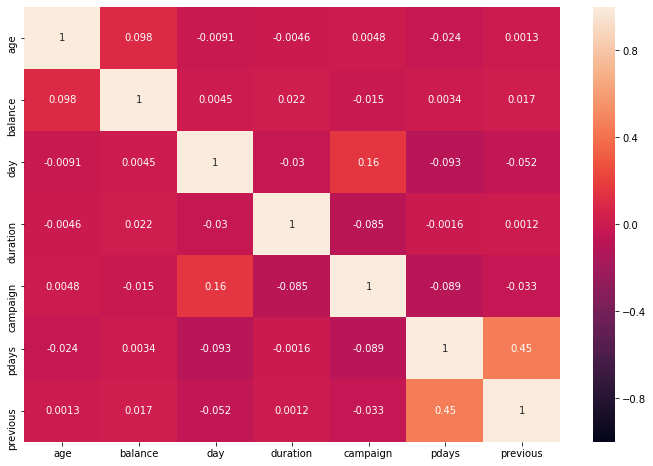

In [39]:
# Correlation Plot before removing outliers
plt.figure(figsize= (12,8))
sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1)

In [40]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,1362.272058,1,0,unknown,5,8,261.0,1.0,-1.0,0.0,3,0


In [41]:
df['education'].value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education, dtype: int64

## Removing Columns

In [42]:
df2=df.drop(['job', 'education', 'contact', 'duration', 'pdays', 'day', 'month'],axis=1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


* __Reasons-__ _for Removing columns:_

* Not necessary = __job, education, contact, duration, pdays, day, month__

- __Job__, __education__ and __contact__ attributes contain _multiple unknown values_

- As they are specific _string values and not numerical_ so cannot be treated with __median or mean__ replacement

- As per data description, __duration__ attribute is removed _to have a realistic prediction_

- __Day__ and __month__ _of contact will not have any relationship with customer opting for subscription_

- __pdays__ and __previous__ are _highly correlated_ so removing any one from both of them

- __poutcome__ has _huge number of Unknown Values but it's __not dropped__ as it is the __outcome of the previous marketing campaign__. Which can help in better training and testing of models_

# Pairplot of all the Features

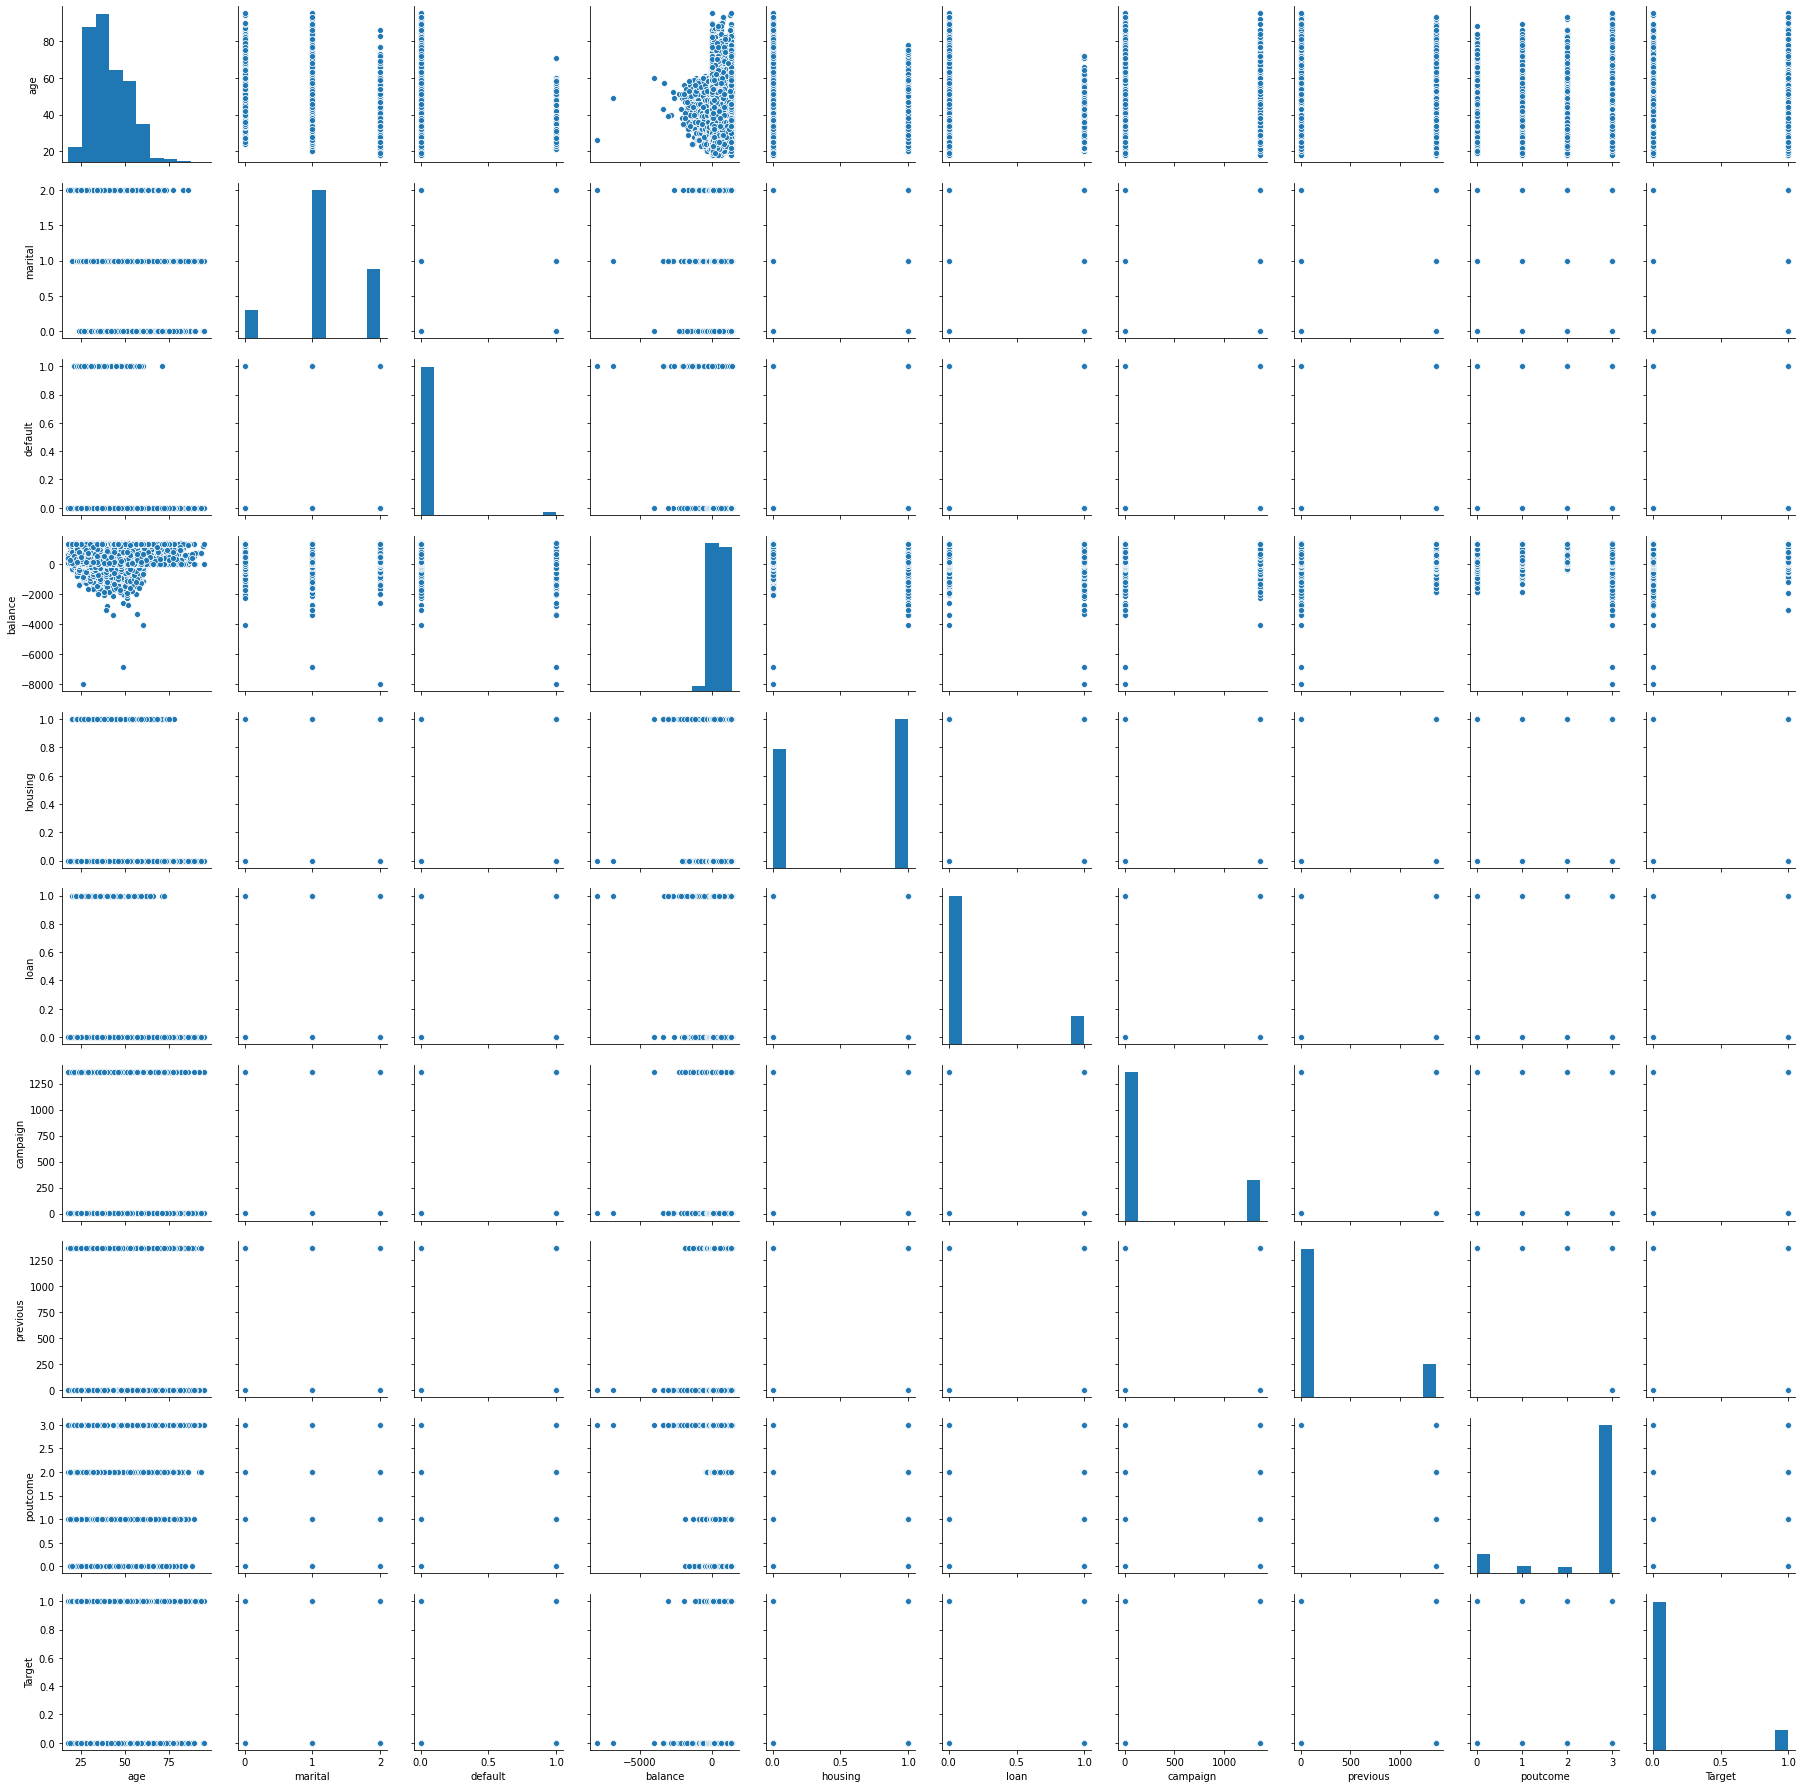

In [43]:
# Pairplot of all the features

sns.pairplot(df2)

#sns.pairplot(df2, hue=df2['Target'])

# Splitting Data into Train and Test

In [44]:
# Split The Data for Training & Testing (70:30)

X=df2.drop('Target', axis=1)   # Dropping Target column as it is independent/target variable
y=df2['Target']                # Selecting Target column

In [45]:
X.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome
0,58,1,0,1362.272058,1,0,1.0,0.0,3
1,44,2,0,29.000000,1,0,1.0,0.0,3
2,33,1,0,2.000000,1,1,1.0,0.0,3
3,47,1,0,1362.272058,1,0,1.0,0.0,3
4,33,2,0,1.000000,0,0,1.0,0.0,3


In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: category
Categories (2, int64): [0, 1]

In [47]:
# Train_test_split of the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Scaling the train-test data

In [48]:
# Scalling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

# Models

## Logistic Regression Model

In [49]:
# Application of logistic Regression

logic_r=LogisticRegression(solver='liblinear')
logic_r.fit(X_train_scaled,y_train)
y_pred = logic_r.predict(X_test_scaled)
LR_accuracy = accuracy_score(y_test, y_pred)

print('\n Confusion Matrix:\n\n', confusion_matrix(y_test,y_pred))
print('\n__________________________________________________________________')
print('\nLogistic Regression Accuracy Score:\n\n',LR_accuracy*100)
print('\n__________________________________________________________________')
print('\n Classification Report:\n \n', classification_report(y_test,y_pred))
print('\n__________________________________________________________________')


 Confusion Matrix:

 [[11903   110]
 [ 1309   242]]

__________________________________________________________________

Logistic Regression Accuracy Score:

 89.53848422294308

__________________________________________________________________

 Classification Report:
 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.69      0.16      0.25      1551

    accuracy                           0.90     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.88      0.90      0.86     13564


__________________________________________________________________


## Naive Bayes

In [50]:
# Application of Naive Bayes
NB=GaussianNB()
NB.fit(X_train_scaled, y_train)
y_predi = NB.predict(X_test_scaled)
NB_accuracy = accuracy_score(y_test, y_pred)

print('\n Confusion Matrix:\n\n', confusion_matrix(y_test,y_predi))
print('\n__________________________________________________________________')
print('\nNaive Bayes Accuracy Score:\n',NB_accuracy*100)
print('\n__________________________________________________________________')
print('\n Classification Report:\n\n' , classification_report(y_test,y_pred))
print('\n__________________________________________________________________')


 Confusion Matrix:

 [[10691  1322]
 [ 1022   529]]

__________________________________________________________________

Naive Bayes Accuracy Score:
 89.53848422294308

__________________________________________________________________

 Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.69      0.16      0.25      1551

    accuracy                           0.90     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.88      0.90      0.86     13564


__________________________________________________________________


##  K-Nearest Neighbors Model (KNN Model)

In [51]:
# Application of K-Nearest Neighbors

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
y_predict = knn.predict(X_test_scaled)
KNN_accuracy = accuracy_score(y_test, y_pred)

print('\n Confusion Matrix\n\n', confusion_matrix(y_test,y_predict))
print('\n__________________________________________________________________')
print('\nK-Nearest Neighbor(KNN) Accuracy Score:\n',KNN_accuracy*100)
print('\n__________________________________________________________________')
print('\n Classification Report:\n\n',classification_report(y_test,y_predict))
print('\n__________________________________________________________________')


 Confusion Matrix

 [[11490   523]
 [ 1217   334]]

__________________________________________________________________

K-Nearest Neighbor(KNN) Accuracy Score:
 89.53848422294308

__________________________________________________________________

 Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.39      0.22      0.28      1551

    accuracy                           0.87     13564
   macro avg       0.65      0.59      0.60     13564
weighted avg       0.85      0.87      0.86     13564


__________________________________________________________________


optimal k is 13


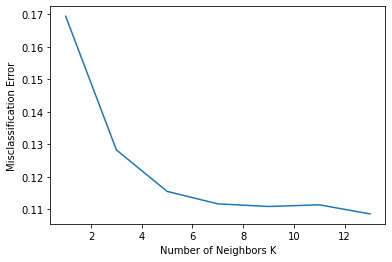

In [52]:
oddList = list(np.arange(1,15)) #Range from 1 to 15
neighbors = list(filter(lambda x: x % 2 != 0, oddList)) #Selecting only odd numbers from Range 1 to 24

accuracy_list = [] #Empty list to store accuracy scores of KNN models based on various K values

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i) #Instantiate KNN with k=i
    knn.fit(X_train_scaled,y_train)  #Call the fit method of KNN to train the model or to learn the parameters of model
    y_pred = knn.predict(X_test_scaled) #Predict 
    accuracy_s = accuracy_score(y_test,y_pred) #for accuracy score
    accuracy_list.append(accuracy_s)  #for appedning accuracy score to accuracy score list
    
MSE=[1 - j for j in accuracy_list] #calculation of Mean Squared Error

optimal = neighbors[MSE.index(min(MSE))] #Optimal K value selected by minimum MSE
print('optimal k is',optimal) #Print optimal K value selected by minimum MSE

plt.plot(neighbors,MSE) #MSE plot 
plt.xlabel('Number of Neighbors K') #XLabel
plt.ylabel('Misclassification Error') #YLabel
plt.show() #display plot

## Support Vector Machine (SVC) Model

In [53]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred1 = svc.predict(X_test_scaled)
svc_accuracy=accuracy_score(y_test,y_pred1)

print('\n Confusion Matrix:\n\n', confusion_matrix(y_test,y_pred1))
print('\n__________________________________________________________________')
print('\n SVC Accuracy Score:\n',svc_accuracy*100)
print('\n__________________________________________________________________')
print('\n Classification Report:\n\n', classification_report(y_test,y_pred1))
print('\n__________________________________________________________________')


 Confusion Matrix:

 [[11869   144]
 [ 1268   283]]

__________________________________________________________________

 SVC Accuracy Score:
 89.59009141846063

__________________________________________________________________

 Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.29      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.88      0.90      0.87     13564


__________________________________________________________________


# Ensemble Models

## Decision Tree

In [54]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1) 
dTree.fit(X_train, y_train) 
predicted_DT = dTree.predict(X_test) 

print('\033[1m''\nConfusion Matrix\n',confusion_matrix(y_test,predicted_DT)) 
print('\n________________________________________________________')
DT_accuracy = accuracy_score(y_test,predicted_DT)
print('\nDecision Tree Accuracy Score :{:.2f}'.format(DT_accuracy)) 
print('_________________________________________________________')
print('\n Classification Report\n',classification_report(y_test,predicted_DT)) 
print('_________________________________________________________')


Confusion Matrix
 [[11029   984]
 [ 1195   356]]

________________________________________________________

Decision Tree Accuracy Score :0.84
_________________________________________________________

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     12013
           1       0.27      0.23      0.25      1551

    accuracy                           0.84     13564
   macro avg       0.58      0.57      0.58     13564
weighted avg       0.83      0.84      0.83     13564

_________________________________________________________


## Feature Importance Test For Decision Tree

In [55]:
# Application of Feature Importance Test for Decision Tree

xvar=df2.drop('Target', axis=1)
feature_cols=xvar.columns

feat_importance= dTree.tree_.compute_feature_importances(normalize=False)

feat_imp_dict=dict(zip(feature_cols, dTree.feature_importances_))

feat_imp=pd.DataFrame.from_dict(feat_imp_dict,orient='index')

feat_imp.sort_values(by=0,ascending=False)



,0
balance,0.437026
age,0.250546
poutcome,0.094663
campaign,0.081906
marital,0.045808
previous,0.034347
loan,0.028533
housing,0.022706
default,0.004465


## Prunning Of Decision Tree

In [56]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
predicted_DTR = dTreeR.predict(X_test) 


print('\033[1m''\nConfusion Matrix\n',confusion_matrix(y_test,predicted_DTR))
print('\n__________________________________________________________________')
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
print('\nAccuracy of Decision Tree with Regularization :{:.2f}'.format(DTR_accuracy))
print('\n__________________________________________________________________')
print('\n Classification Report\n',classification_report(y_test,predicted_DTR))
print('\n__________________________________________________________________')


Confusion Matrix
 [[11826   187]
 [ 1237   314]]

__________________________________________________________________

Accuracy of Decision Tree with Regularization :0.90

__________________________________________________________________

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.63      0.20      0.31      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564


__________________________________________________________________


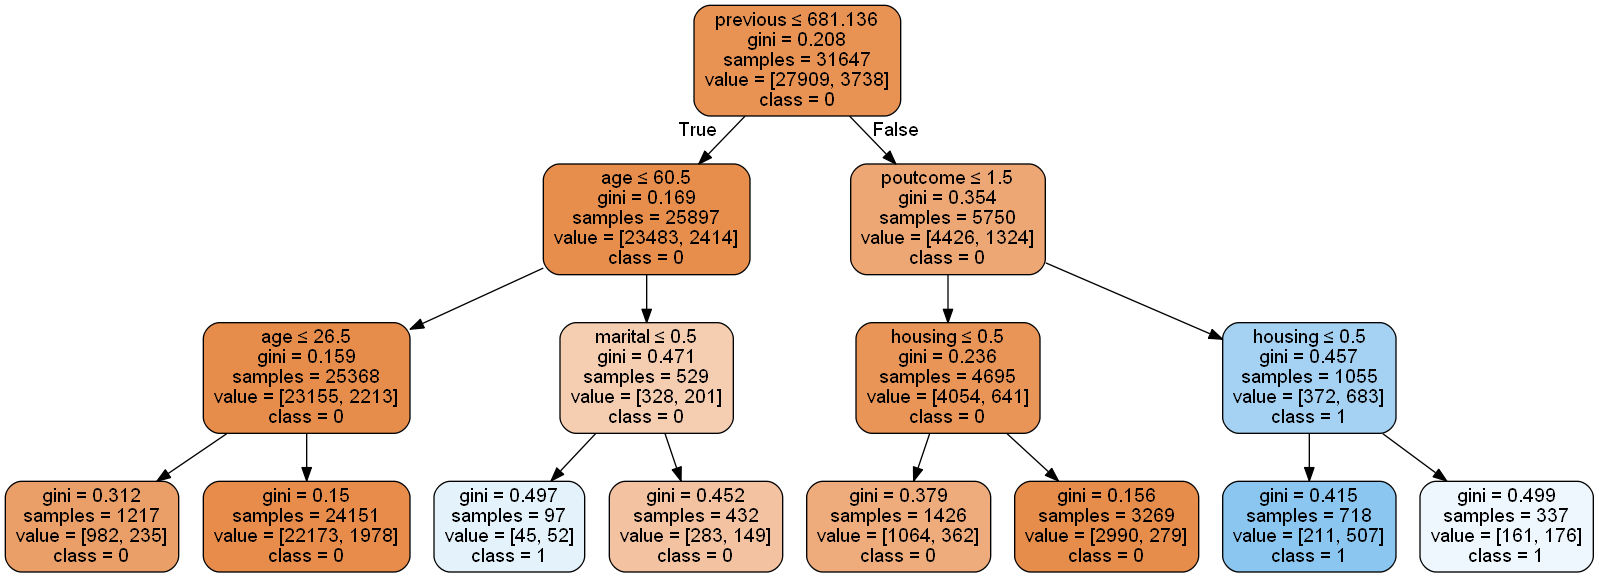

In [57]:
dot_data = StringIO()
export_graphviz(dTreeR, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1']) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('DT.png')
Image(graph.create_png())

### Feature Importances after pruning of decision tree

In [58]:
feat_importance = dTreeR.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(feature_cols, dTreeR.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') 
feat_imp.sort_values(by=0, ascending=False)

,0
poutcome,0.547320
previous,0.215141
age,0.142976
housing,0.087515
marital,0.007048
default,0.000000
balance,0.000000
loan,0.000000
campaign,0.000000


## Bagging Ensemble Model

In [59]:
# Application of Bagging Ensemble Model

bagc=BaggingClassifier(base_estimator=dTree, n_estimators=500, random_state=1)
bagc.fit(X_train, y_train)
predicted_BAG=bagc.predict(X_test)

BAG_accuracy=accuracy_score(y_test,predicted_BAG)
print('\nConfusion Matrix:\n\n', confusion_matrix(y_test,predicted_BAG))
print('\n__________________________________________________________________')
print('\nBagging Accuracy Score:{:.2f}'.format(BAG_accuracy))
print('\n__________________________________________________________________')
print('\n Classification Report:\n\n', classification_report(y_test,predicted_BAG))
print('\n__________________________________________________________________')


Confusion Matrix:

 [[11610   403]
 [ 1225   326]]

__________________________________________________________________

Bagging Accuracy Score:0.88

__________________________________________________________________

 Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.45      0.21      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564


__________________________________________________________________



## Adaptive Boosting Ensemble Model

In [60]:
# Application of Adaptive Boosting Ensemble Model

adab=AdaBoostClassifier(n_estimators=50, random_state=1)
adab.fit(X_train, y_train)
predicted_ADA=adab.predict(X_test)

ADA_accuracy=accuracy_score(y_test,predicted_ADA)
print('\n Confusion Matrix:\n\n', confusion_matrix(y_test,predicted_ADA))
print('\n__________________________________________________________________')
print('\nADA Boost Accuracy Score:{:.2f}\n'.format(ADA_accuracy))
print('\n__________________________________________________________________')
print('\n Classification Report:\n\n', classification_report(y_test,predicted_ADA))
print('\n__________________________________________________________________')


 Confusion Matrix:

 [[11895   118]
 [ 1309   242]]

__________________________________________________________________

ADA Boost Accuracy Score:0.89


__________________________________________________________________

 Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.67      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564


__________________________________________________________________


## Gradient Boosting

In [61]:
# Application of Gradient Boosting Classifier

grad=GradientBoostingClassifier(n_estimators=100, random_state=2)
grad.fit(X_train, y_train)
grad_pred=grad.predict(X_test)

GRAD_accuracy=accuracy_score(y_test,grad_pred)
print('\nConfusion Matrix:\n\n', confusion_matrix(y_test,grad_pred))
print('\n__________________________________________________________________')
print('\nGradient Boosting Accuracy Score:\n{:.2f}'.format(GRAD_accuracy))
print('\n__________________________________________________________________')
print('\n Classification report \n \n', classification_report(y_test, grad_pred))
print('\n__________________________________________________________________')


Confusion Matrix:

 [[11888   125]
 [ 1308   243]]

__________________________________________________________________

Gradient Boosting Accuracy Score:
0.89

__________________________________________________________________

 Classification report 
 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564


__________________________________________________________________



## Random Forest Ensemble model

In [62]:
# Application Of Random Forest Classifier with N_estimators = 100

randf = RandomForestClassifier(n_estimators=100, random_state=1, max_features=3)
randf = randf.fit(X_train, y_train)
predicted_RAN=randf.predict(X_test)


print('\nConfusion Matrix:\n\n', confusion_matrix(y_test,predicted_RAN))
print('\n__________________________________________________________________')

RAN_accuracy = accuracy_score(y_test, predicted_RAN)

print('\nRandom Forest Accuracy Score (n=100):\n{:.2f}'.format(RAN_accuracy))
print('\n__________________________________________________________________')

print('\nClassification report \n \n' , classification_report(y_test,predicted_RAN))
print('\n__________________________________________________________________')



Confusion Matrix:

 [[11580   433]
 [ 1216   335]]

__________________________________________________________________

Random Forest Accuracy Score (n=100):
0.88

__________________________________________________________________

Classification report 
 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.44      0.22      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564


__________________________________________________________________


In [63]:
# Application Of Random Forest Classifier with N_estimators = 500

randf = RandomForestClassifier(n_estimators=500, random_state=1, max_features=3)
randf = randf.fit(X_train, y_train)
predicted_RANN=randf.predict(X_test)


print('\nConfusion Matrix:\n\n', confusion_matrix(y_test,predicted_RANN))
print('\n__________________________________________________________________')

RANN_accuracy = accuracy_score(y_test, predicted_RANN)

print('\nRandom Forest Accuracy Score (Nn=500):\n{:.2f}'.format(RANN_accuracy))
print('\n__________________________________________________________________')

print('\nClassification report \n \n' , classification_report(y_test,predicted_RANN))
print('\n__________________________________________________________________')



Confusion Matrix:

 [[11586   427]
 [ 1220   331]]

__________________________________________________________________

Random Forest Accuracy Score (Nn=500):
0.88

__________________________________________________________________

Classification report 
 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.44      0.21      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564


__________________________________________________________________


#  Model with Accuracy Scores

In [65]:
Scores=[('Naive Bayes', NB_accuracy),
        ('KNN', KNN_accuracy),
        ('Logistic Regression', LR_accuracy),
        ('SVC', svc_accuracy),
        ('Decision Tree ',DT_accuracy),
        ('Decision Tree with Regularization',DTR_accuracy),
        ('Bagging', BAG_accuracy ),
        ('Adaptive Boosting', ADA_accuracy),
        ('Gradient Boosting', GRAD_accuracy),
        ('Random Forest N = 100', RAN_accuracy ),
        ('Random Forest N = 500', RANN_accuracy )]


Scores = pd.DataFrame(Scores, columns=['Model', 'Accuracy Score'])
print('\033[1m' ' Current scores with Outliers replaced with mean:]')

Scores.sort_values(by='Accuracy Score', ascending = False)

 Current scores with Outliers replaced with mean:]


,Model,Accuracy Score
3,SVC,0.895901
0,Naive Bayes,0.895385
1,KNN,0.895385
2,Logistic Regression,0.895385
5,Decision Tree with Regularization,0.895016
7,Adaptive Boosting,0.894795
8,Gradient Boosting,0.894353
6,Bagging,0.879976
10,Random Forest N = 500,0.878576
9,Random Forest N = 100,0.878428


# Conclusion:

## Observations from dataset:

- The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be seen in the       confusion matrix of all models. 

- The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the     confusion matrix of all models. 

- Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and class 1 is huge.       Which trained models to effectively identify class 0 but did not train suffuiciently to classify class 1.

- This situation could have been avoided if the datset was balanced. 

- Along with imbalance, the dataset contained large number of unknown string values in 'job','education','contact' and      'poutcome' columns.




## Observations from Models:
- When benchmarking with 'duration' column, Support Vector Classifier achieved 90% model accuracy while naive bayes score was     85% accurate.

- SVC Perfomed better because of it's capabality of creating multiple hpyerplanes and then classifying the data.

- After removing the 'duration' column, The highest model score dropped by 0.5%.

- The Outliers did not affect much on accuracy scores of all models. As can be seen in above accuracy scores, getting rid of outliers by mean/median replacement did not affect the scores.

- In Decision Trees, Gradient boosting method always performed better for this dataset.

- While visualizing Decision Tree, The Pruned decision tree was easy to visualize as it had lesser leaf nodes than Tree which was not pruned.

- Outlier handeling did not make any significant difference in the accuracy scores of models.
